In [43]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
#from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import PassiveAggressiveClassifier
import sklearn.metrics as metrics
import itertools

## Get data from Datacamp's S3 bucket

In [3]:
df = pd.read_csv("https://s3.amazonaws.com/assets.datacamp.com/blog_assets/fake_or_real_news.csv")
print(df.shape)
print("Number of fakes: ",df[df['label'].str.contains("FAKE")].shape[0])
df.head()

(6335, 4)
Number of fakes:  3164


,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


For now, only text is used as a feature until title is explored differently

In [37]:
# Do a 80-20 split of data into train and test sets. 
df = df[['title','text','label']]
trainX, testX, trainY, testY = train_test_split(df['text'], df['label'], test_size = 0.20, random_state=44)

In [38]:
# Initialize vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english')
train_tfidf = tfidf_vectorizer.fit_transform(trainX)
test_tfidf = tfidf_vectorizer.transform(testX)

In [39]:
#tfidf_vectorizer.get_feature_names()[-10:]
tfidf_df = pd.DataFrame(train_tfidf.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_df.head()

,00,000,0000,000000031,000035,0001,0002,000billion,000ft,000km,...,تنجح,حلب,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Passive Aggressive model 
Linear and takes less time

In [40]:
linear_clf = PassiveAggressiveClassifier(max_iter=50, verbose=1, n_jobs=-1)

In [45]:
linear_clf.fit(train_tfidf, trainY)
pred = linear_clf.predict(test_tfidf)
score = metrics.accuracy_score(testY, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(testY, pred, labels=['FAKE', 'REAL'])

-- Epoch 1
Norm: 38.85, NNZs: 47260, Bias: -0.547484, T: 5042, Avg. loss: 0.318630
Total training time: 0.04 seconds.
-- Epoch 2
Norm: 44.55, NNZs: 48317, Bias: -0.524261, T: 10084, Avg. loss: 0.077343
Total training time: 0.05 seconds.
-- Epoch 3
Norm: 47.20, NNZs: 48943, Bias: -0.523251, T: 15126, Avg. loss: 0.032323
Total training time: 0.06 seconds.
-- Epoch 4
Norm: 48.42, NNZs: 48986, Bias: -0.519739, T: 20168, Avg. loss: 0.015275
Total training time: 0.07 seconds.
-- Epoch 5
Norm: 48.95, NNZs: 48995, Bias: -0.513654, T: 25210, Avg. loss: 0.007762
Total training time: 0.08 seconds.
-- Epoch 6
Norm: 49.19, NNZs: 49025, Bias: -0.514835, T: 30252, Avg. loss: 0.004931
Total training time: 0.08 seconds.
-- Epoch 7
Norm: 49.30, NNZs: 49025, Bias: -0.515225, T: 35294, Avg. loss: 0.003577
Total training time: 0.09 seconds.
-- Epoch 8
Norm: 49.35, NNZs: 49025, Bias: -0.513072, T: 40336, Avg. loss: 0.002986
Total training time: 0.10 seconds.
-- Epoch 9
Norm: 49.38, NNZs: 49025, Bias: -0.513

Confusion matrix, without normalization


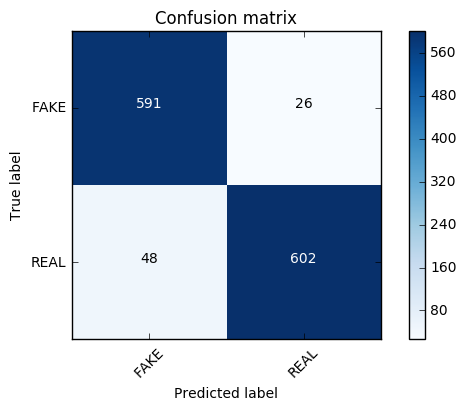

In [46]:
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [ ]:
import pickle

f = open('PAC_model.pckl', 'wb')
pickle.dump(linear_clf, f)
f.close()

### Multinomial NB model 

In [32]:
clf = MultinomialNB()

In [ ]:
train_tfidf[:100].shape

In [33]:
clf.fit(train_tfidf[:100], trainY[:100])
pred = clf.predict(test_tfidf)
print("Accuracy: ", sklearn.metrics.accuracy_score(testY, pred))

cm = sklearn.metrics.confusion_matrix(testY, pred, labels=['FAKE','REAL'])
plot_confusion_matrix(cm, classes=['FAKE','REAL'])

Accuracy:  0.0


/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/metrics/classification.py:248: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if np.all([l not in y_true for l in labels]):


ValueError: At least one label specified must be in y_true

## GBQ stuff that we might not need anymore

In [9]:
sampleDF.to_gbq('FakeNews.SampleTable','vu-nlp',verbose=True)




Load is 100% Complete




In [2]:
def load_sample():
  q = bqd.Query(sql='''
    SELECT
      title
    FROM
      `vu-nlp.FakeNews.FAKENEWS` 
  WHERE
    country = 'US'
    and language ='english'
  LIMIT 10
  ''')
  
  print("Executing BigQuery query...")
  return(q.execute().result().to_dataframe())

sampleDF = load_sample()
sampleDF

NameError: global name 'bqd' is not defined